In [5]:
import pandas as pd
import h5py


file_path = "/playpen-ssd/levi/w4c/weather4cast_data/w4c25/2019/OPERA/boxi_0015.train.rates.crop.h5"

with h5py.File(file_path, "r") as f:
    
    # List top-level groups/datasets
    print("Keys:", list(f.keys()))
    
    # Example: access a dataset
    dataset_name = list(f.keys())[0]  # or replace with a known name
    data = f[dataset_name][:]
    print("Shape:", data.shape)
    print("Data type:", data.dtype)

Keys: ['rates.crop']
Shape: (20308, 1, 252, 252)
Data type: float64


In [6]:
import numpy as np


arr = np.array(data)
arr.shape

(20308, 1, 252, 252)

In [29]:
# [B, C, H, W]
sample = arr[2005, :, :, :]
print(sample.min(), sample.max(), "\n", sample.shape)

# we're going to assume that OPERA radar-rain rates should be clipped @0.0
clipped_sample = sample.clip(0)
print(clipped_sample.min(), clipped_sample.max(), "\n", clipped_sample.shape)

-8888000.0 0.1300048828125 
 (1, 252, 252)
0.0 0.1300048828125 
 (1, 252, 252)


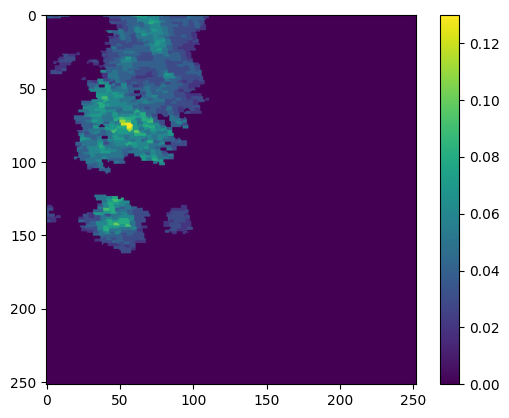

In [ ]:
import torch
import matplotlib.pyplot as plt


img_like_cs = torch.Tensor(clipped_sample).permute(1, 2, 0);
# img_like_cs_norm = (img_like_cs - img_like_cs.min()) / (img_like_cs.max() - img_like_cs.min())

# an exmaple of OPERA radar rain-rate data
plt.imshow(img_like_cs, cmap='viridis');
plt.colorbar()
plt.show()